# Naive Bayes with Labeled Text Data

## Introduction

In this section, I accomplished the following things. First, use the text data related to personal credit obtained from Twitter above and perform sentiment analysis on the text data using packages such as nltk and scikit-learn. I used the categories obtained from the sentiment analysis as the labels of the dataset to make the dataset with three categories. And statistical analysis was performed on each category. Second, feature X and label y of the input model are selected and input to the tfidf model to get the importance vector of the text. Third, the Naive Bayesian Classifier is built using the MultinomialNB() function. and predictions are made on the test set, and finally the matrices and values of various model evaluations, such as classification accuracy, confusion matrix, etc., are output.

## Theory

Naive Bayes is a classification algorithm based on Bayes' theorem on the assumption of independent distribution.

* Advantages

The naive Bayes algorithm assumes that the data set attributes are independent of each other, so the logic of the algorithm is very simple and the algorithm is more stable, and the classification performance of naive Bayesian does not vary much when the data presents different characteristics. In other words, the robustness of the naive Bayesian algorithm is better, and it does not present much variability for different types of data sets. The naive Bayesian classification algorithm will have better results when the relationships between the attributes of the dataset are relatively independent.

* Disadvantages

The condition of attribute independence is at the same time a shortcoming of the naive Bayesian classifier. The independence of dataset attributes is difficult to be satisfied in many cases because the attributes of the dataset are often interrelated with each other, and if this problem occurs during the classification process, it will lead to a significant reduction in the effectiveness of the classification.

* Application of NB

Classification is a fundamental problem in the field of data analysis and machine learning. Text classification has been widely used in many aspects such as web information filtering, information retrieval and information recommendation. Data-driven classifier learning has been a hot topic in recent years with many approaches, such as neural networks, decision trees, support vector machines, and Naive Bayes. Compared with other elaborate and more complex classification algorithms, the naive Bayesian classification algorithm is one of the classifiers with better learning efficiency and classification results. Intuitive text classification algorithm and the simplest Bayesian classifier with good interpretability, the Naive Bayesian algorithm is characterized by the assumption that all features appear independent of each other and each feature is equally important. But in fact this assumption does not hold in the real world: firstly, the necessary connection between two adjacent words cannot be independent; secondly, for an article, some representative words in it determine its topic, and it is not necessary to read through the whole article and check all words. So a suitable method for feature selection is needed so that the plain Bayesian classifier can achieve higher classification efficiency.

![](NB.png)

## Methods

import packages

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

Import text data

In [58]:
txt = pd.read_csv("Labeled_text_data.csv")
txt = txt.drop(columns=['Unnamed: 0'])

txt.head()

,text,Positive,Negative,Neutral,Compound,Sentiment,sentiment
0,r how credit meta ball studios mcq lgz,0.302,0.000,0.698,0.3818,Positive,1
1,r justin herbert gets too much credit for bein...,0.219,0.143,0.637,0.2263,Positive,1
2,r fo new do de santis charli cris with,0.000,0.000,1.000,0.0000,Neutral,0
3,r saturns more xgx image nas y z,0.000,0.000,1.000,0.0000,Neutral,0
4,r justin herbert gets too much credit for bein...,0.219,0.143,0.637,0.2263,Positive,1


Now let's count how many observations each label has. For label 0 (Neutral), the data set has 149 observations. For label 1 (Positive), the data set has 81 observations. For label 2 (negative), the data set has only 15 observations. So generally speaking this is a very unbalanced classification data set.

In [59]:
txt.sentiment.value_counts()

0    154
1     81
2     15
Name: sentiment, dtype: int64

In [60]:
txt["sentiment"] = txt['sentiment'].astype(str)

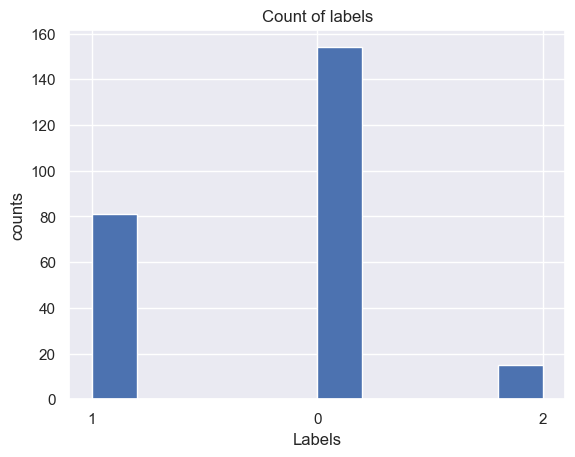

In [61]:
plt.hist(txt['sentiment'])
plt.title("Count of labels")
plt.xlabel("Labels")
plt.ylabel("counts")
plt.show()

In [62]:
txt.isna().sum()

text         5
Positive     0
Negative     0
Neutral      0
Compound     0
Sentiment    0
sentiment    0
dtype: int64

In [63]:
txt = txt.dropna()
txt.isna().sum()

text         0
Positive     0
Negative     0
Neutral      0
Compound     0
Sentiment    0
sentiment    0
dtype: int64

Select features `X` and labels `y` and split the data set into training set and test set.

In [64]:
X = txt['text']
y = txt['sentiment']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build a Multinomial Naive Bayes Model through sklearn and make predictions.

In [66]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(X_train, y_train)
# Predict the categories of the test data
predicted_categories = model.predict(X_test)

plot the confusion matrix

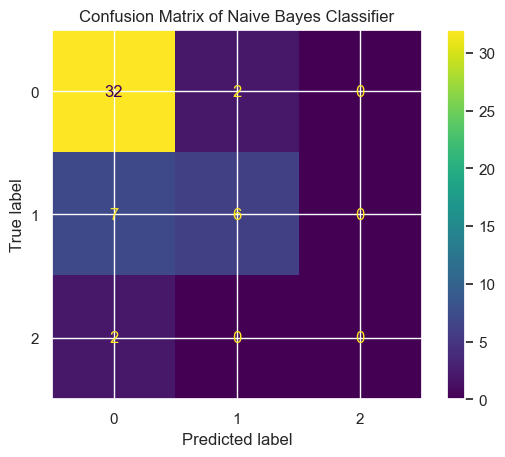

In [67]:
cm = confusion_matrix(y_test, predicted_categories, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix of Naive Bayes Classifier")
plt.show()

Print the confusion matrix.

In [68]:
print(confusion_matrix(y_test, predicted_categories))

[[32  2  0]
 [ 7  6  0]
 [ 2  0  0]]


Get the classification report.

In [69]:
from sklearn.metrics import classification_report
target_names = ['0','1','2']
print(classification_report(y_test, predicted_categories, target_names=target_names))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        34
           1       0.75      0.46      0.57        13
           2       0.00      0.00      0.00         2

    accuracy                           0.78        49
   macro avg       0.51      0.47      0.47        49
weighted avg       0.74      0.78      0.74        49



/Users/wangshiyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangshiyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangshiyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Result 

Generally speaking, the model prediction accuracy is 0.66. It performs well but definitely not the best. I think it is partly because the dataset is too small and the content is not completely clean. The twitter data fetched from twitter api contains information from various language and it may not make sense to analyze the complex contents all together. But the result is acceptable. From the confusion matrix, we can see that all the data from label=2 are mis-classified. It is a terrible result but we could just say that twitter text data contain multiple languages, and they are very oral and simplified so basic data processing may not lead to a good result.

## Conclusions

Naive Bayes algorithms are mostly used in sentiment analysis, spam filtering, recommendation systems etc. They are fast and easy to implement but their biggest disadvantage is that the requirement of predictors to be independent. In most of the real life cases, the predictors are dependent, this hinders the performance of the classifier.

* In spite of my apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.

* Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.


## References

https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

https://www.geeksforgeeks.org/naive-bayes-classifiers/